In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('loan_prediction.csv')

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(614, 13)

We have 614 rows and 13 columns in our dataset.

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History are numeric type.

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status are categorical data

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History. We will replace null values with in categorical data while with median in numeric data.

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. Difference between 75th percentile and max value clearly shows presence of outliers.

2. Also, mean and median are varying, which shows our data is skewed.

<AxesSubplot:xlabel='Gender', ylabel='count'>

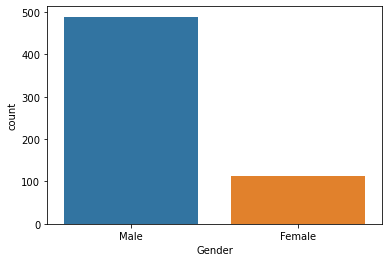

In [20]:
sns.countplot(df['Gender'])

There are more number Male who applies for loan than Female

<AxesSubplot:xlabel='Married', ylabel='count'>

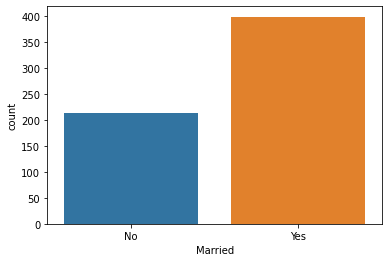

In [21]:
sns.countplot(df['Married'])

The person who are married applies for loan more frequently.

<AxesSubplot:xlabel='Education', ylabel='count'>

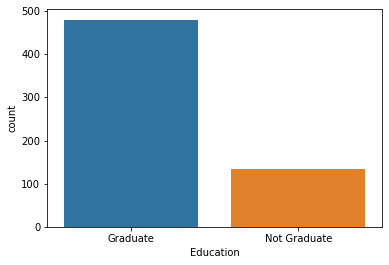

In [22]:
sns.countplot(df['Education'])

Graduate people applies for loan ore than non-grduate people.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

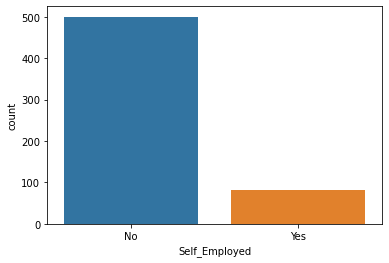

In [23]:
sns.countplot(df['Self_Employed'])

The people who are not self-employed applies for more loan than those who are employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

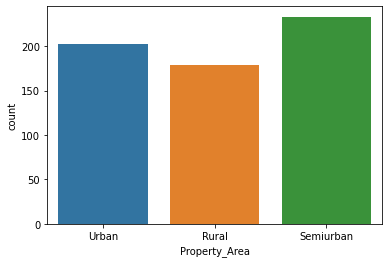

In [24]:
sns.countplot(df['Property_Area'])

People applying for loan are living in three regions namely Urban, Rural and SemiUrban with majority of loan application from Semiurban region followed by urban and then rural.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

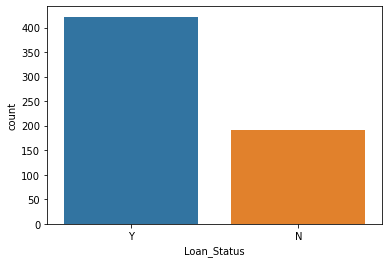

In [25]:
sns.countplot(df['Loan_Status'])

Target variable Loan status is quite imbalanced. So, we will perform over sampling using SMOTE.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

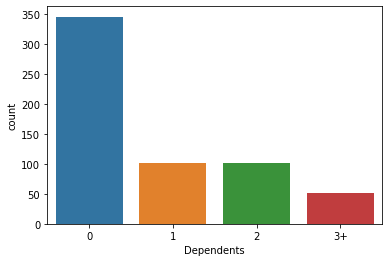

In [26]:
sns.countplot(df['Dependents'])

People applying for loan have 0, 1,2 or 3+ dependents with Majority of people having 0 dependents and very few of them have 3+ dependents

<AxesSubplot:ylabel='Frequency'>

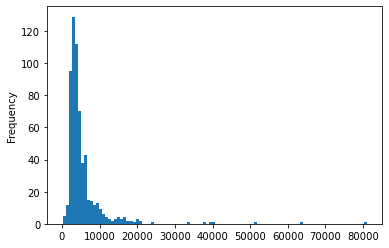

In [27]:
df['ApplicantIncome'].plot.hist(bins=100)

Income of the people applying for loan ranges between 0 to 20k having big spike between 5k to 10k. Very few people have income greater than 20k.

<AxesSubplot:ylabel='Frequency'>

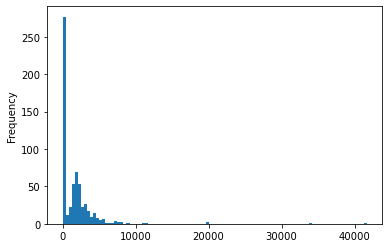

In [28]:
df['CoapplicantIncome'].plot.hist(bins=100)

Majority of the Coapplicant have 0 income while few have income  less than 10k.

<AxesSubplot:ylabel='Frequency'>

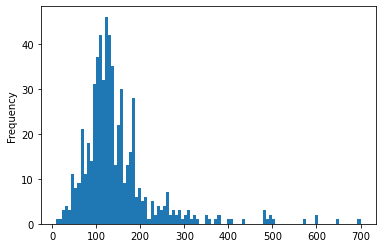

In [29]:
df['LoanAmount'].plot.hist(bins=100)

Majority of the loans are applied for the amount between 100 and 200.

<AxesSubplot:ylabel='Frequency'>

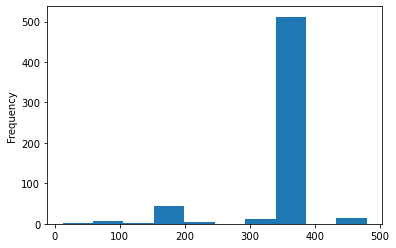

In [30]:
df['Loan_Amount_Term'].plot.hist()

Majority of the loan amount term is between 300 and 400.

<AxesSubplot:ylabel='Frequency'>

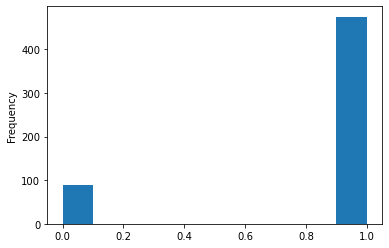

In [31]:
df['Credit_History'].plot.hist()

Majority of the people have creidit history 1 and very few have 0. Also we can see credit history have only two unique values. So we can treat it as object type.

<AxesSubplot:xlabel='Gender', ylabel='count'>

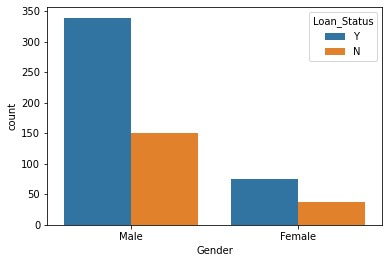

In [32]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

Loan is approved for Males more than females.

<AxesSubplot:xlabel='Married', ylabel='count'>

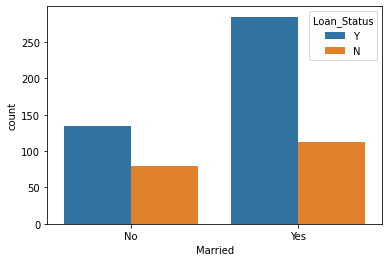

In [33]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

The people who are married have high probability of getting the loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

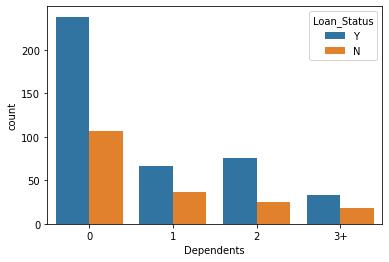

In [34]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

People with 0 dependents have high chances of loan approval. But they have high rejecton rate as well.

<AxesSubplot:xlabel='Education', ylabel='count'>

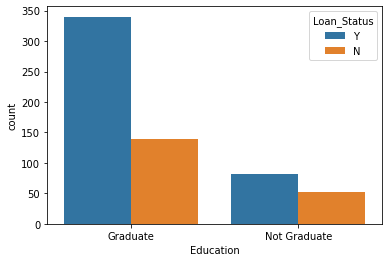

In [35]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

Loan rejection rate for Non-graduate people is less than graduate people.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

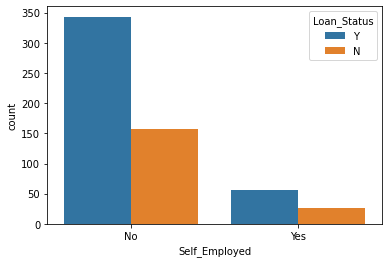

In [36]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

Loan rejection rate for non-employed people is more comapred to self employed people.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

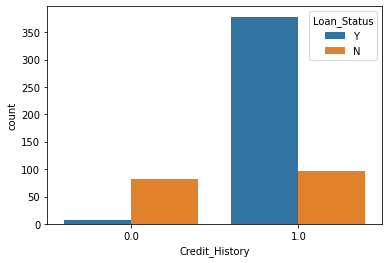

In [37]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

people with credit history 1 has high probability of loan approval.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

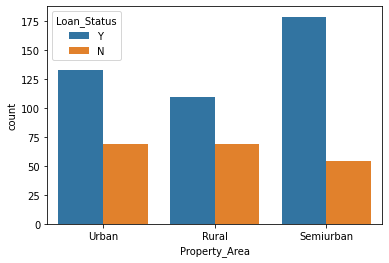

In [38]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People living in semiurban region has high chances of loan approval than others.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

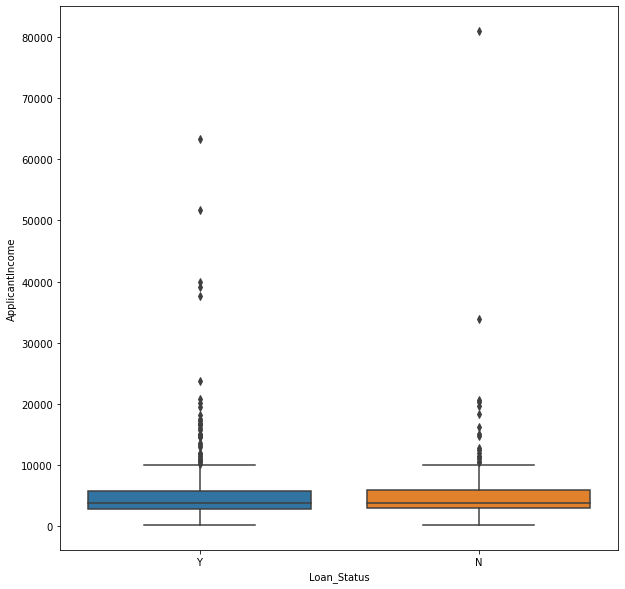

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

People with high income get loan approval easily than the people with low income.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

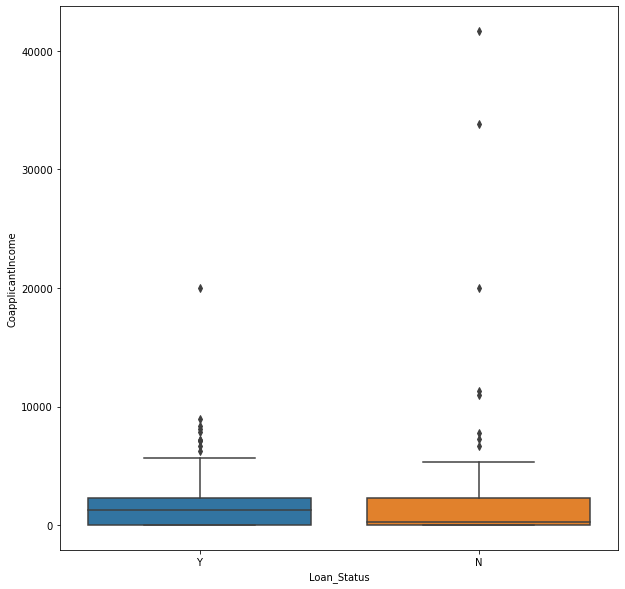

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df)

People with high income get loan approval eas`mily than the people with low income.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

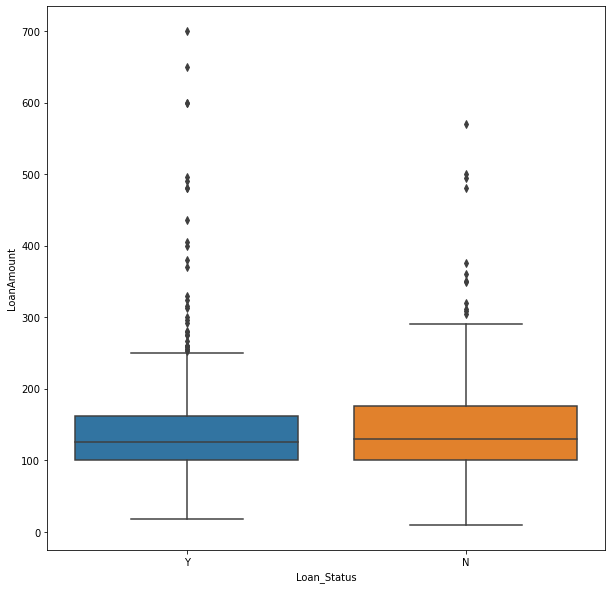

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)

people with high loan amount tends to get approved.

Replacing null values in the dataset:-

In [42]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [43]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


<AxesSubplot:>

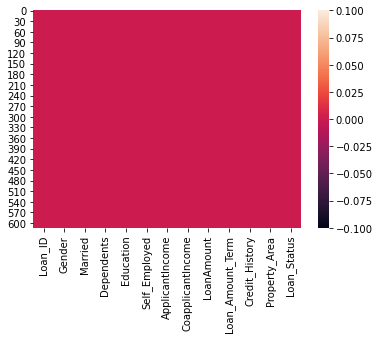

In [44]:
sns.heatmap(df.isnull())

Now, there are no null values.

In [45]:
#Extracting numerical features for further analysis:
num_features = df.select_dtypes(include=[np.number]) 
num_features.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

OutlierDetection:

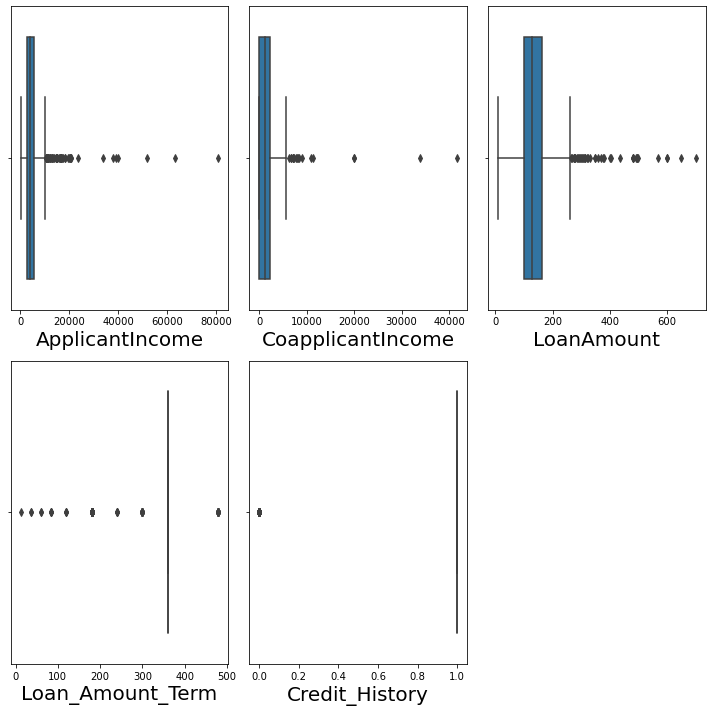

In [46]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(num_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

We can see outliers are present in all the columns except credit history.

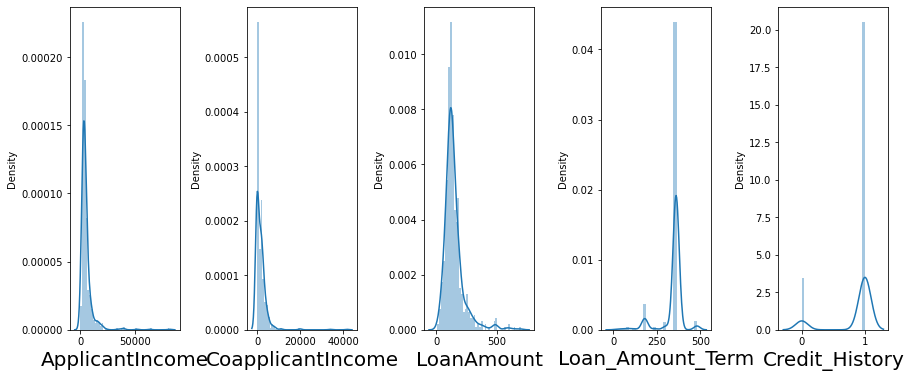

In [47]:
#Bivariate Analysis
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=11:
        ax=plt.subplot(2,6,plotnumber)
        sns.distplot(num_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

Data is positively skewed in all the columns.

In [48]:
#Removing outliers using z-score
from scipy.stats import zscore
z=np.abs(zscore(num_features))

In [49]:
df=df[(z<3).all(axis=1)]
df.shape

(577, 13)

After removing outliers we have 577 rows and 13 columns

In [50]:
#One Hot EnCoding for independent variables:
df = pd.get_dummies(df, columns=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area'])

In [51]:
#Label Encoding for target variable
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])  

In [52]:
#As Loan_ID is not useful in our prediction, we will drop it
df.drop('Loan_ID',axis=1,inplace=True)

In [53]:
#Separating x and y for model evaluation
x=df.drop('Loan_Status',axis=1)
y=df[['Loan_Status']]

In [54]:
#Checking the skewness
x.skew()

ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Gender_Female              1.622920
Gender_Male               -1.622920
Married_No                 0.630211
Married_Yes               -0.630211
Dependents_0              -0.400457
Dependents_1               1.847753
Dependents_2               1.813247
Dependents_3+              3.201476
Education_Graduate        -1.306588
Education_Not Graduate     1.306588
Self_Employed_No          -2.252848
Self_Employed_Yes          2.252848
Property_Area_Rural        0.894207
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
dtype: float64

In [55]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
         x[i]=np.square(x[i])

x.skew()  

ApplicantIncome            0.845845
CoapplicantIncome         -0.038951
LoanAmount                 0.054080
Loan_Amount_Term          -0.939069
Credit_History            -1.976043
Gender_Female              1.623047
Gender_Male               -1.622920
Married_No                 0.630371
Married_Yes               -0.630211
Dependents_0              -0.400457
Dependents_1               1.847656
Dependents_2               1.813477
Dependents_3+              3.201172
Education_Graduate        -1.306588
Education_Not Graduate     1.306641
Self_Employed_No          -2.252848
Self_Employed_Yes          2.251953
Property_Area_Rural        0.894043
Property_Area_Semiurban    0.513184
Property_Area_Urban        0.736816
dtype: float64

In [56]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)
x_

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.574088,0.000000,0.573225,0.490909,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.510509,0.551707,0.573225,0.490909,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.411635,0.000000,0.379843,0.490909,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.379919,0.640357,0.552450,0.490909,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.581035,0.000000,0.605210,0.490909,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.404311,0.000000,0.399129,0.490909,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
573,0.483508,0.000000,0.259510,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
574,0.666379,0.298982,0.822111,0.490909,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
575,0.647692,0.000000,0.704696,0.490909,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Treating Class Imbalance Using SMOTE:

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x_,y)

In [59]:
y_over.value_counts()

Loan_Status
1              398
0              398
dtype: int64

In [60]:
x_over.shape

(796, 20)

In [61]:
y_over.shape

(796, 1)

### Finding the best random state

In [62]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.803347280334728  on Random_state  68


### Model Evaluation

In [63]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)

### Decision Tree Classifier

0.7615062761506276
[[ 75  27]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       102
           1       0.80      0.78      0.79       137

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



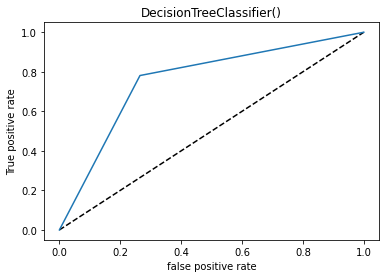

auc_score: 0.7581580077286391




In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Random Forest Classifier

0.8786610878661087
[[ 87  15]
 [ 14 123]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       102
           1       0.89      0.90      0.89       137

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



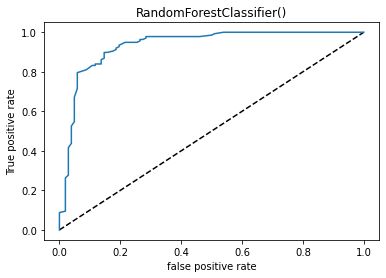

auc_score: 0.8753756977243452




In [65]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Logistic Regression

0.803347280334728
[[ 68  34]
 [ 13 124]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       102
           1       0.78      0.91      0.84       137

    accuracy                           0.80       239
   macro avg       0.81      0.79      0.79       239
weighted avg       0.81      0.80      0.80       239



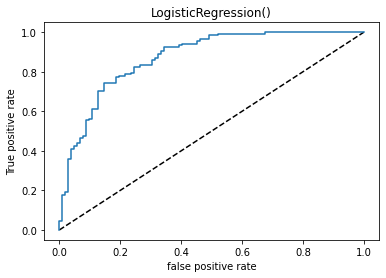

auc_score: 0.7858880778588808




In [66]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Performing Cross-Validation

In [67]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,x_over,y_over,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.70625    0.71069182 0.74842767 0.79245283 0.81132075]
0.7538286163522012 0.04231040925096027


In [68]:
rfscores=cross_val_score(rf,x_over,y_over,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.7625     0.77987421 0.82389937 0.89937107 0.85534591]
0.8241981132075471 0.04978456216975222


In [69]:
lgscores=cross_val_score(lg,x_over,y_over,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.69375    0.73584906 0.68553459 0.74842767 0.7672956 ]
0.7261713836477988 0.03156800833049992


### Hyper-Parameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [70]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

In [71]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [72]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500]})

In [73]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}


0.8493723849372385
[[ 73  29]
 [  7 130]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       102
           1       0.82      0.95      0.88       137

    accuracy                           0.85       239
   macro avg       0.87      0.83      0.84       239
weighted avg       0.86      0.85      0.85       239



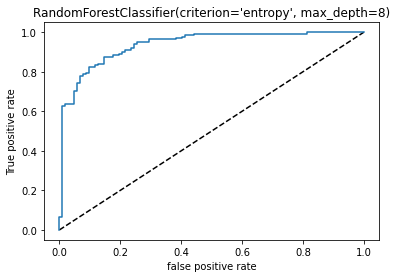

auc_score: 0.8322956919994275




In [74]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [75]:
rfcscores=cross_val_score(rfc,x_over,y_over,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.7125     0.75471698 0.79874214 0.83018868 0.86163522]
0.7915566037735849 0.05303241655635478


In [82]:
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [83]:
tree=DecisionTreeClassifier()

In [84]:
grid_search=RandomizedSearchCV(tree,param_dist,cv=5)

In [85]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000005CD86DAF40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000005CD5EBE580>})

In [86]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5}


0.7824267782426778
[[ 84  18]
 [ 34 103]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       102
           1       0.85      0.75      0.80       137

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239



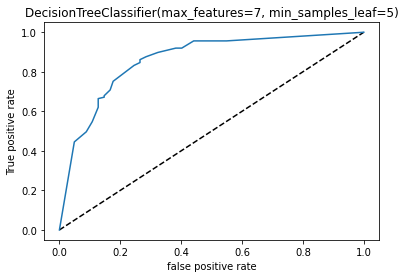

auc_score: 0.787677114641477
[0.675      0.74842767 0.6918239  0.78616352 0.83647799]
0.7475786163522012 0.05961351866091948




In [88]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=7,min_samples_leaf=5)
tree.fit(x_train,y_train)
tree.score(x_train,y_train)
preddtc=tree.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=tree.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=tree)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(tree)
plt.show()
auc_score=roc_auc_score(y_test,tree.predict(x_test))
print("auc_score:" ,auc_score)
treescores=cross_val_score(tree,x_over,y_over,cv=5)
print(treescores)
print(treescores.mean(),treescores.std())
print("\n")

After the model evaluation , In Random Forest Classifier with default parameter, we get the precision and recall for both the target variable as 0.89 and 0.90. The f1- score of the model is 0.89. The ROC curve gave us the AUC score which is 0.87. Model evaluation gives the results that the prediction is very accurate.

### Saving the model

In [89]:
import joblib
joblib.dump(rf,'loan_status.pkl')

['loan_status.pkl']